### Riferimenti bibliografici:

* Azzalini, A. &  Scarpa, B. (2012), [Data Analysis and Data Mining: An Introduction](http://azzalini.stat.unipd.it/Book-DM/index.html).

# Minimi quadrati ordinari e ricorsivi con NumPy

## Indice

1. [Diabetes dataset](#dataset)<br>
2. [Minimi quadrati ordinari](#ordinari)<br>
3. [Minimi quadrati ricorsivi](#ricorsivi)<br>
4. [Flusso di dati](#flusso)<br>

In [7]:
import inspect
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. [Diabetes dataset](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset) <a id=dataset> </a>

In [8]:
from sklearn import datasets

X, y = datasets.load_diabetes(return_X_y=True)
X = X[:, [2]] # tengo solo la variabile Body mass index

In [9]:
from msbd.grafici import grafico_progressione_diabete_vs_bmi

print(inspect.getsource(grafico_progressione_diabete_vs_bmi))

def grafico_progressione_diabete_vs_bmi(x, y):
    """Grafico della progressione del diabete al variare del BMI"""
    plt.title("Progressione del diabete vs BMI")
    plt.scatter(x, y, alpha=.75)
    plt.xlabel("BMI")
    plt.ylabel("Progressione del diabete")



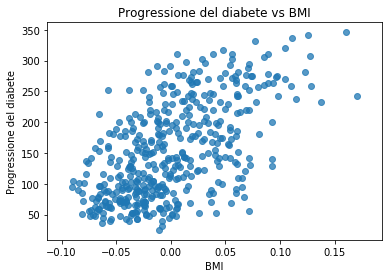

In [10]:
grafico_progressione_diabete_vs_bmi(X, y)

plt.show()

# 2. Minimi quadrati ordinari <a id=ordinari> </a>

### Esercizio

1. Completare il metodo `fit()`, stima dei coefficienti con il metodo dei minimi quadrati ordinari, della classe `RegressioneLineare` in `msbd/modello_lineare/regressione_lineare.py`;

2. Verificare il proprio codice utilizzando pytest.

Si ricorda che la stima dei coefficienti $\hat{\beta}$ con il metodo dei minimi quadrati ordinari consiste in $\hat{\beta}=(X^TX)^{-1}X^Ty$.

In [11]:
from msbd.modello_lineare import RegressioneLineare

print(inspect.getsource(RegressioneLineare))

class RegressioneLineare():
    """Regressione lineare

    Parameters
    ----------
    fit_intercept : boolean, optional, default True
        Se calcolare l'intercetta per questo modello. Se impostato su
        False, nei calcoli non verrà usata nessuna intercetta
        (e.g. i dati dovrebbero essere già centrati).

    Attributes
    ----------
    coef_ : array, shape (n_features, ) o (n_targets, n_features)
        Coefficienti stimati per il problema di regressione lineare.
        Se durate il fit sono passati più target (y 2D), questo è un
        array 2D di forma (n_targets, n_features), mentre se viene
        passato solo un target, questo è un array 1D di lunghezza
        n_features.

    intercept_ : array
        Termine costante nel modello lineare.
    """
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept

    def fit(self, X, y):
        if self.fit_intercept:
            X = np.c_[np.ones(len(X)), X]

        # TODO: stimare

In [12]:
!pytest -v msbd/tests/test_regressione_lineare_fit.py

============================= test session starts =============================
platform win32 -- Python 3.7.6, pytest-5.4.1, py-1.8.1, pluggy-0.13.1 -- C:\Users\Lorenzo\anaconda3\envs\msbd\python.exe
cachedir: .pytest_cache
hypothesis profile 'default' -> database=DirectoryBasedExampleDatabase('C:\\Users\\Lorenzo\\Desktop\\STUDY\\Big Data\\.hypothesis\\examples')
rootdir: C:\Users\Lorenzo\Desktop\STUDY\Big Data
plugins: hypothesis-5.5.4, arraydiff-0.3, astropy-header-0.1.2, doctestplus-0.5.0, openfiles-0.4.0, remotedata-0.3.2
collecting ... collected 4 items

msbd/tests/test_regressione_lineare_fit.py::test_fit_intercept_true_intercept_ PASSED [ 25%]
msbd/tests/test_regressione_lineare_fit.py::test_fit_intercept_true_coef_ PASSED [ 50%]
msbd/tests/test_regressione_lineare_fit.py::test_fit_intercept_false_intercept_ PASSED [ 75%]
msbd/tests/test_regressione_lineare_fit.py::test_fit_intercept_false_coef_ PASSED [100%]

============================== warnings summary ====================

Ridisegnamo il grafico a dispersione precedente utilizzando la classe `RegressioneLineare`.

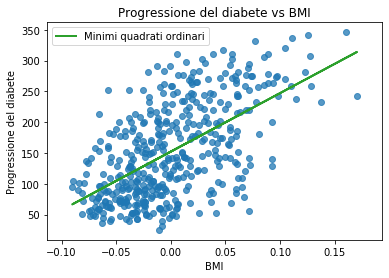

In [13]:
rl = RegressioneLineare()
rl.fit(X, y)
y_hat = rl.predict(X)

grafico_progressione_diabete_vs_bmi(X, y)
plt.plot(X, y_hat, c='tab:green', lw=2, label="Minimi quadrati ordinari")
plt.legend()
plt.show()

La classe `linear_model` di scikit-learn non ha un metodo per ottenere rapidamente i p-value associati ai coefficienti stimati.

Per ottenere un `summary`del modello (di regressione lineare), è più comodo utilizzare il metodo `OLS` del package `stastmodels.api`.

In [14]:
import statsmodels.api as sm

diabetes_ols = sm.OLS(X, y)

diabetes_fit = diabetes_ols.fit()
diabetes_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.070
Model:                            OLS   Adj. R-squared (uncentered):              0.068
Method:                 Least Squares   F-statistic:                              33.27
Date:                Mon, 30 Mar 2020   Prob (F-statistic):                    1.51e-08
Time:                        14:17:30   Log-Likelihood:                          735.08
No. Observations:                 442   AIC:                                     -1468.
Df Residuals:                     441   BIC:                                     -1464.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          7.388e-05   1.28e-05      5.768      0.000    4.87e-05    9.91e-05
==============================================================================
Omnibus:                       23.077   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.524
Skew:                           0.587   Prob(JB):                     2.87e-06
Kurtosis:                       3.091   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3. Minimi quadrati ricorsivi <a id=ricorsivi> </a>

### Esercizio

1. Completare il metodo `partial_fit()`, stima dei coefficienti tramite l'algoritmo dei minimi quadrati ricorsivi, della classe `RegressioneLineare` in `msbd/modello_lineare/regressione_lineare.py`; 

2. Verificare il proprio codice utilizzando pytest.

Da pagina 34 di *Data Analysis and Data Mining* abbiamo che

**Algoritmo** Minimi quadrati ricorsivi

1. $W_{(p\times p)} = 0,\, u_{(p\times 1)} = 0.$
2. Ciclo per $n = 1,\, \dots,\, p$:
    1. leggo l'$n$-esimo record: $x = \tilde{x}_n,\, y = \tilde{y}_n$;
    2. $W = W + xx^\top$;
    3. $u = u + xy$.
    4. Se $n = p$:
        1. $V = W^{-1}$.
        2. $\hat{\beta} = Vu$.
3. Ciclo per $n = p + 1,\, p + 2, \dots$:
    1. leggo l'$n$-esimo record: $x = \tilde{x}_n,\, y = \tilde{y}_n$;
    2. $h = 1 / (1 + x^{\top}Vx)$;
    3. $e = y - x^{\top}\hat{\beta}$;
    4. $\hat{\beta} = \hat{\beta} + hVxe$;
    5. $V = V - hVxx^{\top}V$.

In [16]:
!pytest -v msbd/tests/test_regressione_lineare_partial_fit.py

============================= test session starts =============================
platform win32 -- Python 3.7.6, pytest-5.4.1, py-1.8.1, pluggy-0.13.1 -- C:\Users\Lorenzo\anaconda3\envs\msbd\python.exe
cachedir: .pytest_cache
hypothesis profile 'default' -> database=DirectoryBasedExampleDatabase('C:\\Users\\Lorenzo\\Desktop\\STUDY\\Big Data\\.hypothesis\\examples')
rootdir: C:\Users\Lorenzo\Desktop\STUDY\Big Data
plugins: hypothesis-5.5.4, arraydiff-0.3, astropy-header-0.1.2, doctestplus-0.5.0, openfiles-0.4.0, remotedata-0.3.2
collecting ... collected 4 items

msbd/tests/test_regressione_lineare_partial_fit.py::test_fit_intercept_true_intercept_ PASSED [ 25%]
msbd/tests/test_regressione_lineare_partial_fit.py::test_fit_intercept_true_coef_ PASSED [ 50%]
msbd/tests/test_regressione_lineare_partial_fit.py::test_fit_intercept_false_intercept_ PASSED [ 75%]
msbd/tests/test_regressione_lineare_partial_fit.py::test_fit_intercept_false_coef_ PASSED [100%]

============================== warni

# 4. Flusso di dati <a id=flusso> </a>

In [18]:
# zip - esempio
# https://www.learnbyexample.org/python-zip-function/
a = [1, 2, 3]
b = [4, 5, 6]
zipped = zip(a, b)

for a, b in zipped:
    print("a={}, b={}".format(a,b))

a=1, b=4
a=2, b=5
a=3, b=6


In [19]:
# enumerate - esempio
# http://book.pythontips.com/en/latest/enumerate.html
a = [1, 2, 3]
b = [4, 5, 6]
zipped = zip(a, b)

enum = enumerate(zipped, start=1)

for conta, (a, b) in enumerate(zip(a, b), 1):
    print("{}. a={}, b={}".format(conta, a, b))

1. a=1, b=4
2. a=2, b=5
3. a=3, b=6


Regressione lineare dopo l'arrivo di 10 osservazioni:


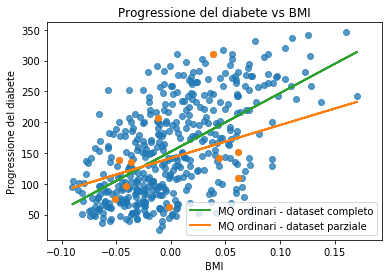

Regressione lineare dopo l'arrivo di 20 osservazioni:


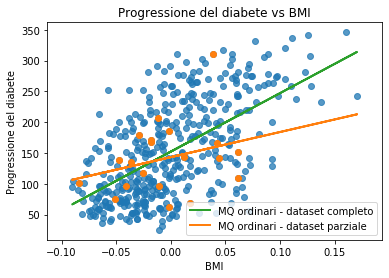

Regressione lineare dopo l'arrivo di 30 osservazioni:


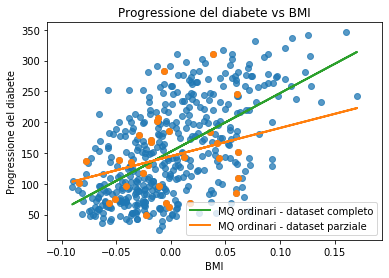

Regressione lineare dopo l'arrivo di 40 osservazioni:


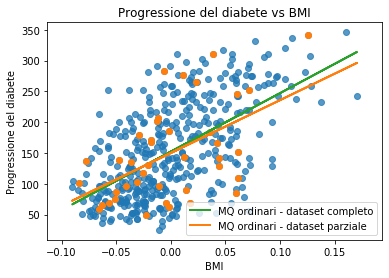

Regressione lineare dopo l'arrivo di 50 osservazioni:


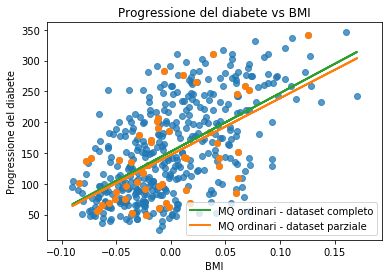

Regressione lineare dopo l'arrivo di 100 osservazioni:


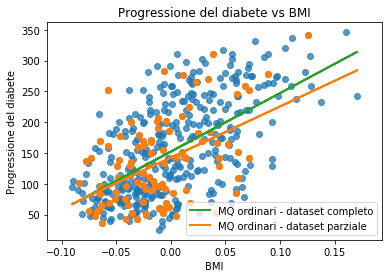

Regressione lineare dopo l'arrivo di 200 osservazioni:


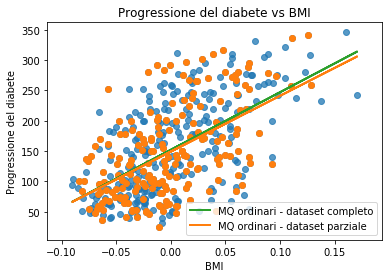

Regressione lineare dopo l'arrivo di 300 osservazioni:


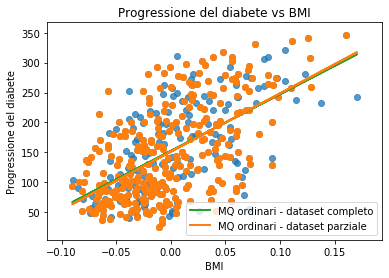

Regressione lineare dopo l'arrivo di 400 osservazioni:


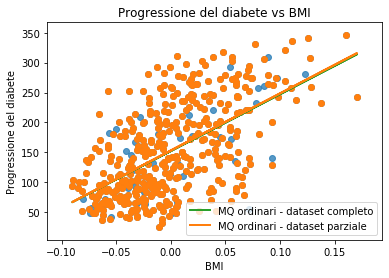

1.92 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [20]:
%%timeit -n 1 -r 1

mqo = LinearRegression() # oppure RegressioneLineare, provare...
mqo.fit(X, y)
y_hat = mqo.predict(X)

for i, (xn, yn) in enumerate(zip(X, y), 1):
    if i == 1:
        X_par = xn
        y_par = yn
    else:
        X_par = np.vstack([X_par, xn])
        y_par = np.vstack([y_par, yn])

    if i % 10 ** (1 + (i > 50)) == 0:
        mqo = LinearRegression()
        mqo.fit(X_par, y_par)
        y_hat_par = mqo.predict(X)
    
        print("Regressione lineare dopo l'arrivo di {} osservazioni:".format(i))
        grafico_progressione_diabete_vs_bmi(X, y)
        plt.scatter(X[:i], y[:i], color="tab:orange")
        plt.plot(X, y_hat, color='tab:green', lw=2, label="MQ ordinari - dataset completo")
        plt.plot(X, y_hat_par, color="tab:orange", lw=2, label="MQ ordinari - dataset parziale")
        plt.legend(loc="lower right")
        plt.show()

Ripetiamo la simulazione del flusso di dati, questa volta confrontando la stima ottenuta con l'algoritmo dei minimi quadrati ordinari sul dataset completo con quella ottenuto con l'algoritmo dei minimi quadrati ricorsivi all'arrivo di nuove osservazioni.

Regressione lineare dopo l'arrivo di 10 osservazioni:


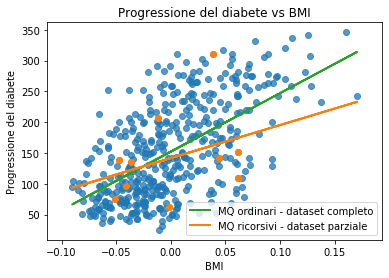

Regressione lineare dopo l'arrivo di 20 osservazioni:


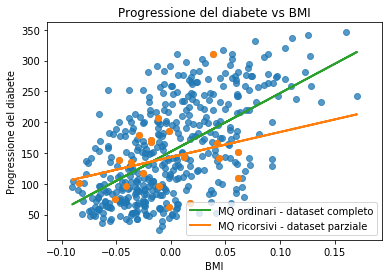

Regressione lineare dopo l'arrivo di 30 osservazioni:


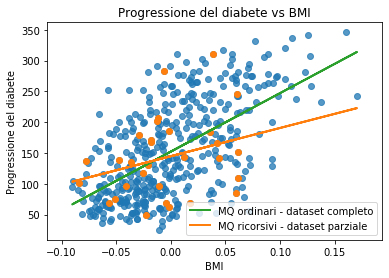

Regressione lineare dopo l'arrivo di 40 osservazioni:


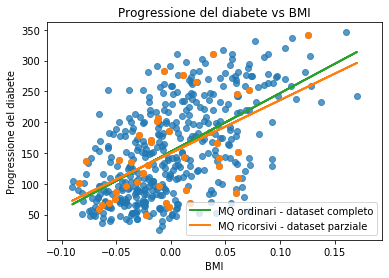

Regressione lineare dopo l'arrivo di 50 osservazioni:


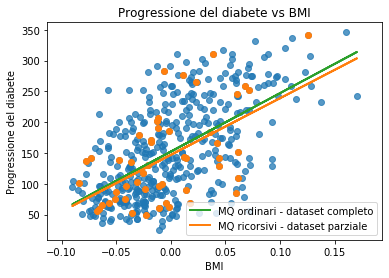

Regressione lineare dopo l'arrivo di 100 osservazioni:


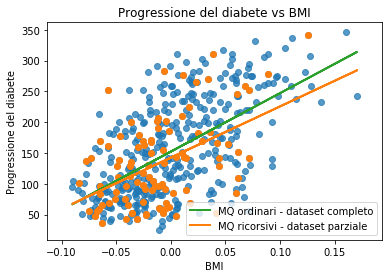

Regressione lineare dopo l'arrivo di 200 osservazioni:


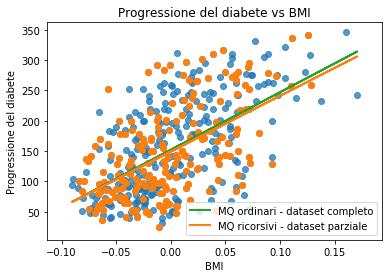

Regressione lineare dopo l'arrivo di 300 osservazioni:


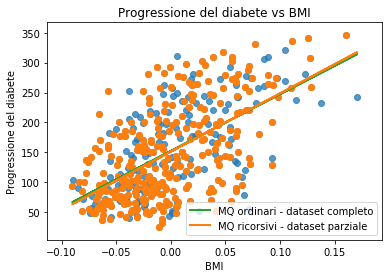

Regressione lineare dopo l'arrivo di 400 osservazioni:


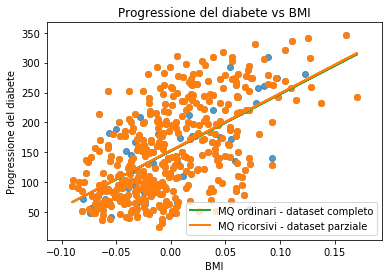

1.76 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [21]:
%%timeit -n 1 -r 1

mqo = RegressioneLineare()
mqr = RegressioneLineare()

mqo.fit(X, y)
y_hat = mqo.predict(X)

for i, (xn, yn) in enumerate(zip(X, y), 1):
    mqr.partial_fit(xn, yn)

    if i % 10 ** (1 + (i > 50)) == 0:
        y_hat_par = mqr.predict(X)
    
        print("Regressione lineare dopo l'arrivo di {} osservazioni:".format(i))
        grafico_progressione_diabete_vs_bmi(X, y)
        plt.scatter(X[:i], y[:i], color="tab:orange")
        plt.plot(X, y_hat, color='tab:green', lw=2, label="MQ ordinari - dataset completo")
        plt.plot(X, y_hat_par, color="tab:orange", lw=2, label="MQ ricorsivi - dataset parziale")
        plt.legend(loc="lower right")
        plt.show()